In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [165]:
df=pd.read_csv("/content/sample_data/train.csv")

In [166]:
df.shape

(45211, 11)

In [167]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [168]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [169]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# Data Jar

In [170]:
# Structured - yes
# Right Format
# Missing values
# Duplicates
#outliers

In [171]:
#Checking data types
df.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


In [172]:
#checking null values
df.isna().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


In [173]:
#checking duplicates count
df.duplicated().sum()

6

In [174]:
#dropping the duplicates
df=df.drop_duplicates()

In [175]:
#checking the dataset output values
df['y'].value_counts()

,count
y,
no,39916
yes,5289


In [176]:
#outlier
#since we have more categorical columns we can do outlier detection after EDA.

# Exploratory Data Analysis (EDA):

In [177]:
#Mapping the categorical outcome value into numerical value

df['y'] = df['y'].map({'no':0, 'yes':1})

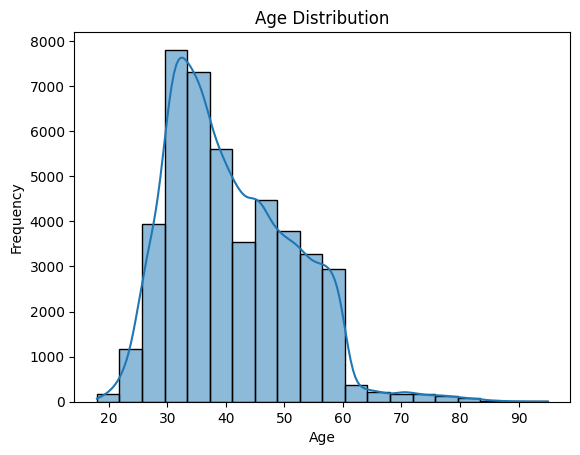

In [178]:
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

#From this chart we can clearly indentify the maximum customer range false between 30-40

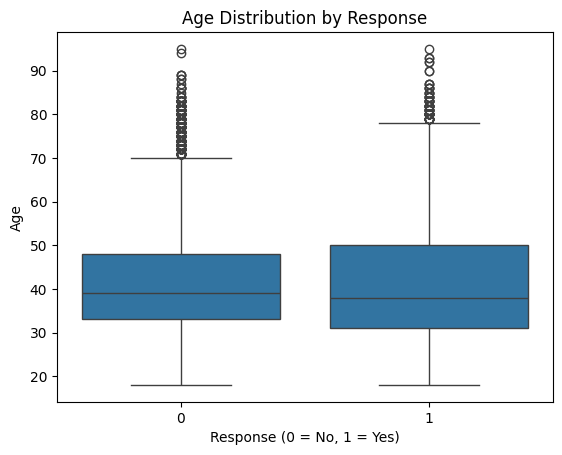

In [179]:
sns.boxplot(x=df['y'], y=df['age'])
plt.title("Age Distribution by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


#customer covertion age

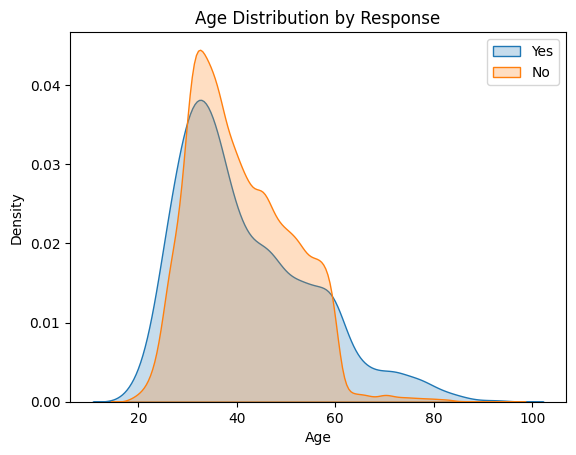

Correlation between age and response: 0.025125993235085572


In [180]:
sns.kdeplot(df[df['y']==1]['age'], label='Yes', shade=True)
sns.kdeplot(df[df['y']==0]['age'], label='No', shade=True)
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

#since both values falls in same range its difficult to predict the convertion.
# we will check for the coorelation

corr = df['age'].corr(df['y'])
print('Correlation between age and response:', corr)

#Not good Correlation

In [181]:
#Job

df['job'].value_counts()

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


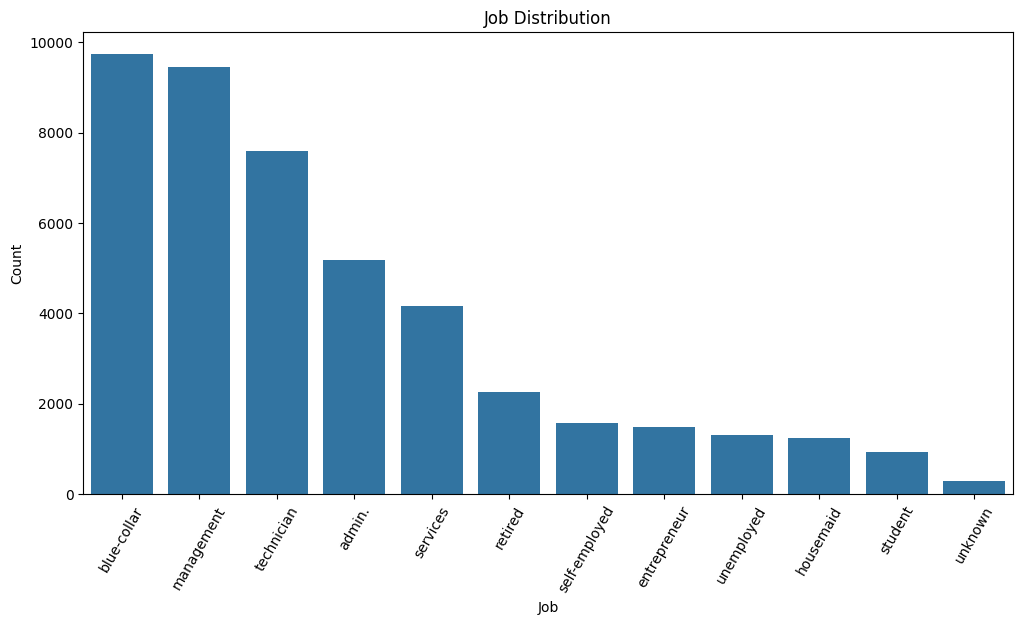

In [182]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['job'], order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

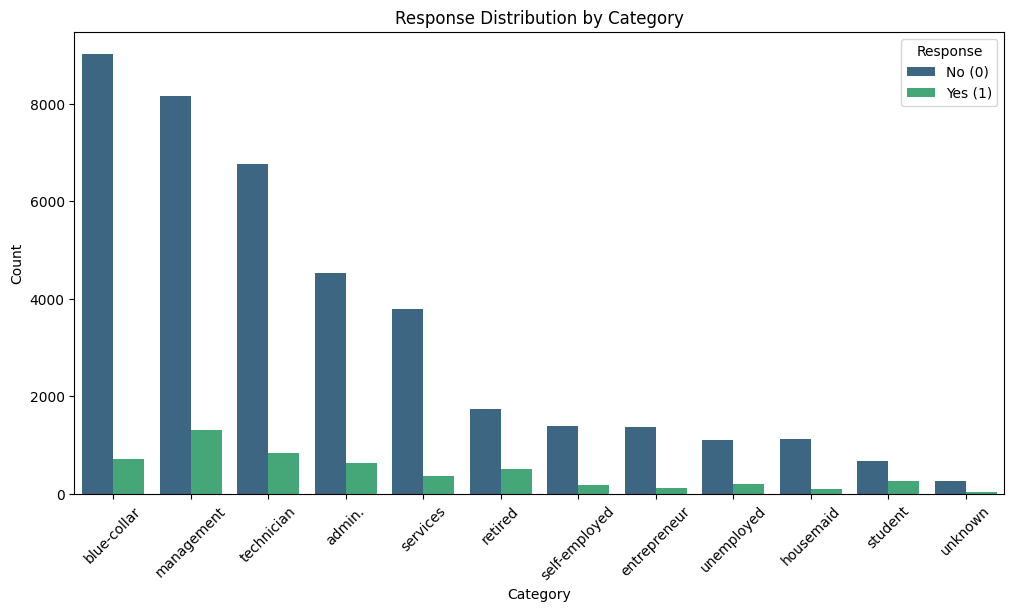

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x=df['job'], hue=df['y'], order=df['job'].value_counts().index, palette="viridis")

plt.title("Response Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate for readability
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

#In chart we can clearly the peoples job and their conversion
#No coorelation since job is a categorical value.
#Later we can do Encoding.

In [184]:
df['marital'].value_counts()

,count
marital,
married,27210
single,12788
divorced,5207


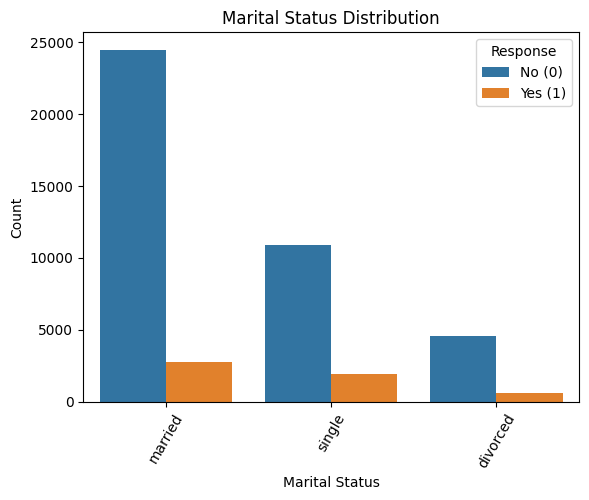

In [185]:
sns.countplot(x=df['marital'],hue=df['y'], order=df['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

#we can clearly identify the convertion variations in the martial columns

In [186]:
df['education_qual'].value_counts()

,count
education_qual,
secondary,23199
tertiary,13299
primary,6850
unknown,1857


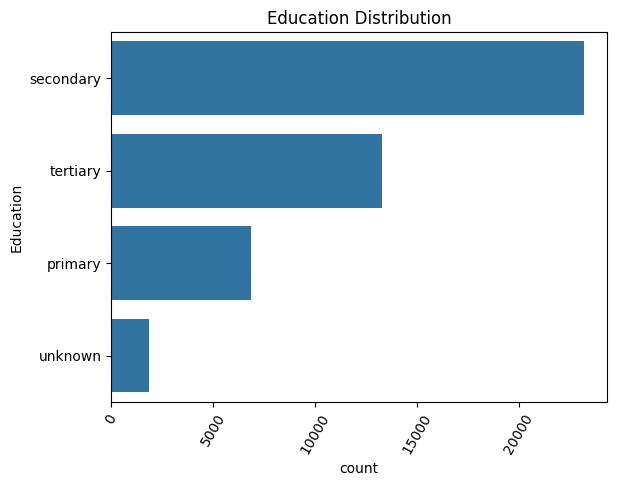

In [187]:
sns.countplot(y=df['education_qual'], order=df['education_qual'].value_counts().index)
plt.title('Education Distribution')
plt.xlabel('count')
plt.ylabel('Education')
plt.xticks(rotation=60)
plt.show()


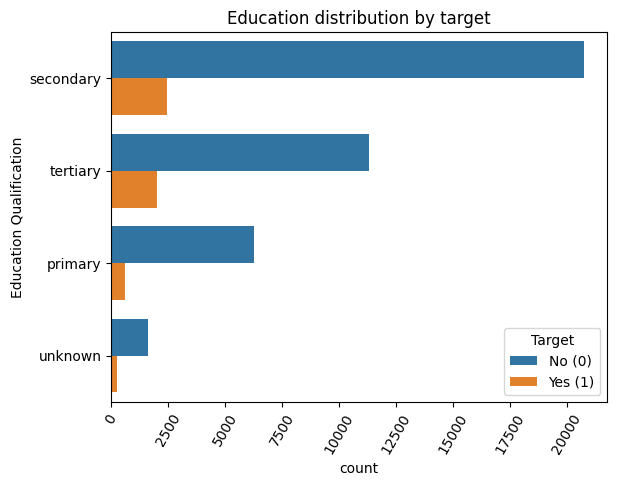

In [188]:
sns.countplot(y=df['education_qual'], hue=df['y'], order=df['education_qual'].value_counts().index)
plt.title('Education distribution by target')
plt.ylabel('Education Qualification')
plt.xlabel('count')
plt.xticks(rotation=60)
plt.legend(title="Target", labels=["No (0)", "Yes (1)"])
plt.show()

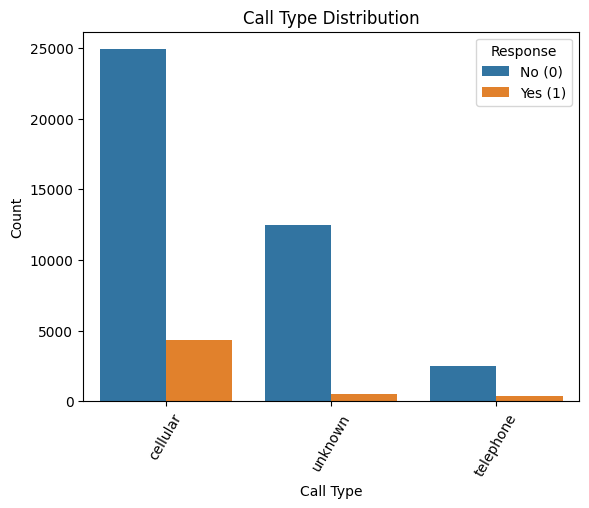

In [189]:
#call_type

sns.countplot(x=df['call_type'],hue=df['y'], order=df['call_type'].value_counts().index)
plt.title('Call Type Distribution')
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

In [190]:
#Day Column

df['day'].value_counts().sort_index().head(),df.groupby('day')['y'].value_counts().head()

(day
 1     322
 2    1292
 3    1079
 4    1445
 5    1910
 Name: count, dtype: int64,
 day  y
 1    0     232
      1      90
 2    0    1110
      1     182
 3    0     901
 Name: count, dtype: int64)

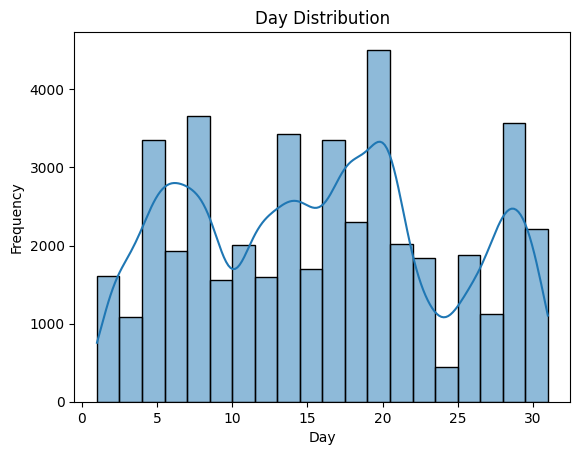

In [191]:
sns.histplot(df['day'], bins=20, kde=True)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Day Distribution')
plt.show()

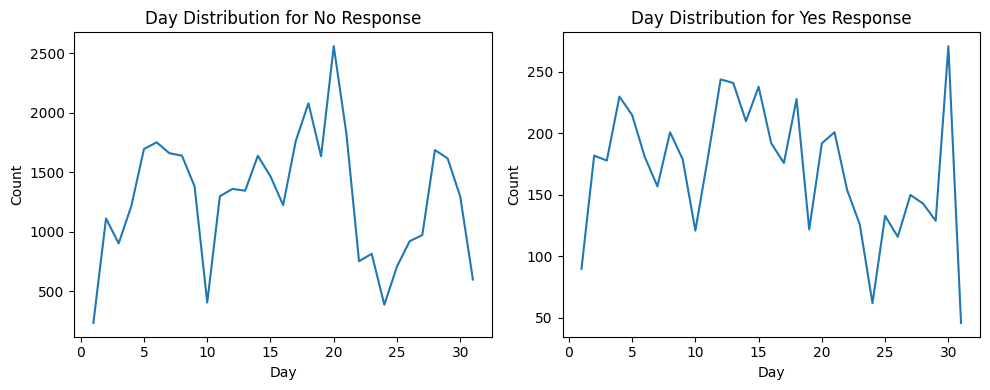

In [192]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
df_day_0 = df[df['y'] == 0].groupby('day').size().reset_index(name='count')
sns.lineplot(x='day',y='count', data=df_day_0, ax=axes[0])
axes[0].set_title('Day Distribution for No Response')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')

df_day_1 = df[df['y'] == 1].groupby('day').size().reset_index(name='count')
sns.lineplot(x='day',y='count', data=df_day_1, ax=axes[1])
axes[1].set_title('Day Distribution for Yes Response')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



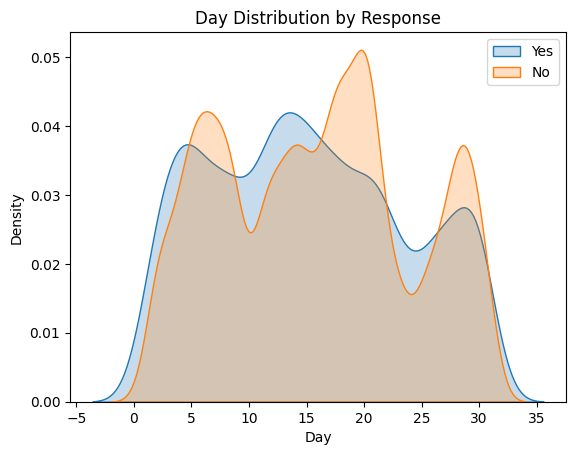


 co-realation : -0.028370532541669158


In [193]:
sns.kdeplot(df[df['y']==1]['day'], label='Yes', shade=True)
sns.kdeplot(df[df['y']==0]['day'], label='No', shade=True)
plt.title('Day Distribution by Response')
plt.xlabel('Day')
plt.ylabel('Density')
plt.legend()
plt.show()

print()
print(f" co-realation : {df['day'].corr(df['y'])}") # worst coorelation

In [194]:
#Month

df['mon'].value_counts()

,count
mon,
may,13765
jul,6894
aug,6245
jun,5339
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


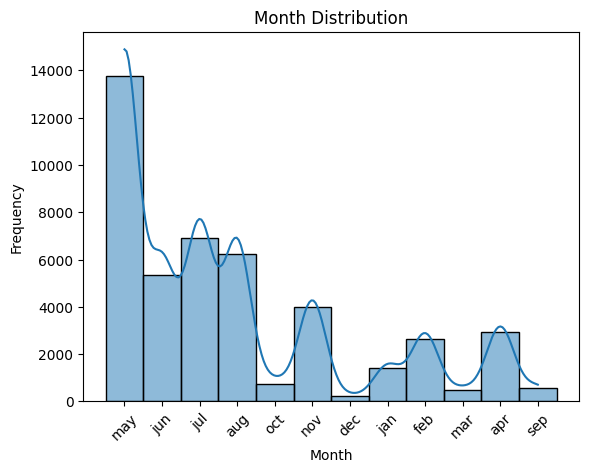

In [195]:

# Plot histogram
sns.histplot(df['mon'], bins=20, kde=True)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Month Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

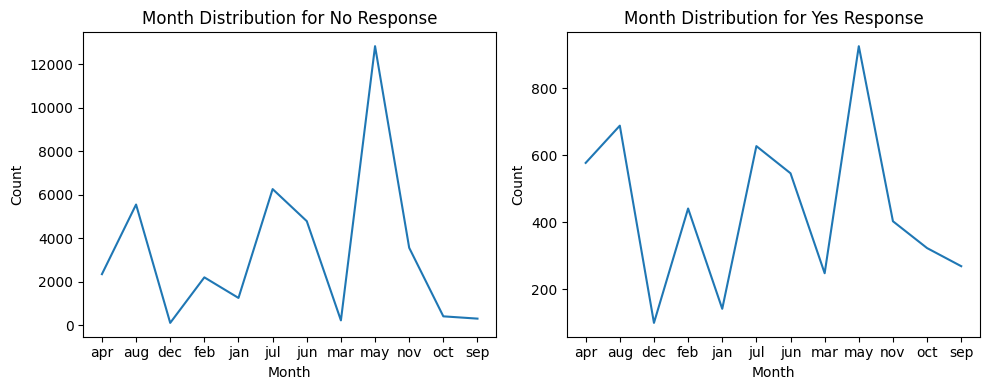

In [196]:
df_mon_1 = df[df['y']==1].groupby('mon').size().reset_index(name='count')
df_mon_0 = df[df['y']==0].groupby('mon').size().reset_index(name='count')

# Create subplots

fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(x='mon',y='count',data=df_mon_0,ax=axes[0])
axes[0].set_title('Month Distribution for No Response')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

sns.lineplot(x='mon',y='count',data=df_mon_1,ax=axes[1])
axes[1].set_title('Month Distribution for Yes Response')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

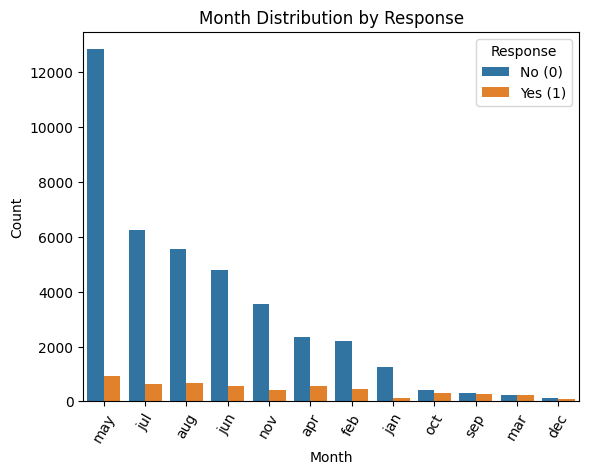

In [197]:
sns.countplot(x=df['mon'], hue=df['y'], order=df['mon'].value_counts().index)
plt.title('Month Distribution by Response')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

In [198]:
#dur column

df.groupby('y')['dur'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,39916.0,221.199870,207.393363,0.0,95.0,164.0,279.0,4918.0
1,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


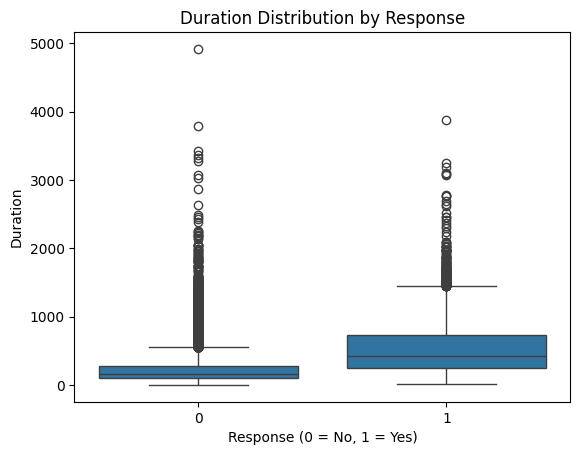

In [199]:
sns.boxplot(x=df['y'], y=df['dur'])
plt.title("Duration Distribution by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Duration")
plt.show()

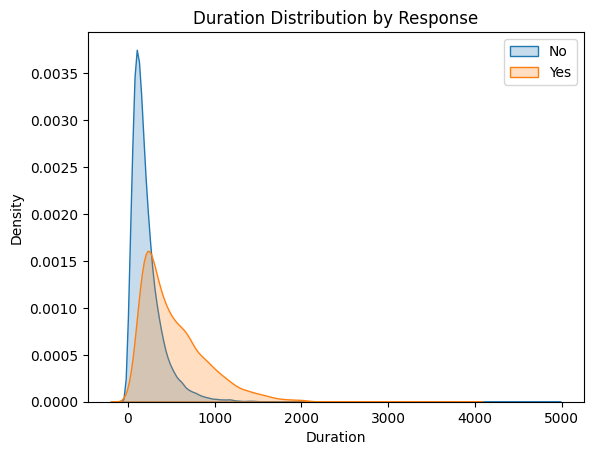

Correlation between duration and response: 0.3945060538655021


In [200]:
sns.kdeplot(df[df['y']==0]['dur'], label='No', shade=True)
sns.kdeplot(df[df['y']==1]['dur'], label='Yes', shade=True)
plt.title('Duration Distribution by Response')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
plt.show()

#Long duration = convertion

corr1 = df['dur'].corr(df['y'])
print('Correlation between duration and response:', corr1)

In [201]:
#num_calls
df['num_calls'].value_counts()

,count
num_calls,
1,17542
2,12503
3,5521
4,3520
5,1764
6,1291
7,735
8,540
9,327


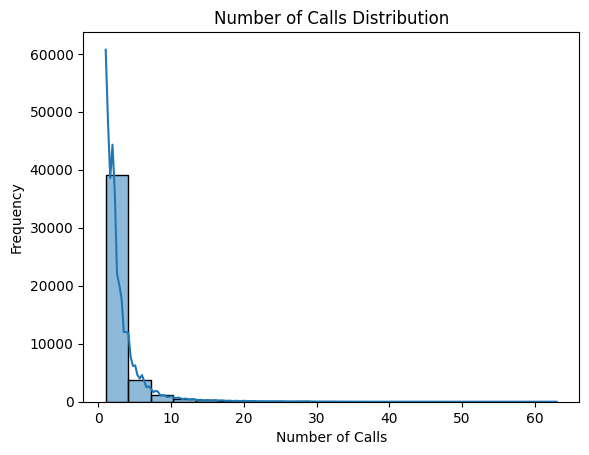

In [202]:
sns.histplot(df['num_calls'], bins=20, kde=True)
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Number of Calls Distribution')
plt.show()

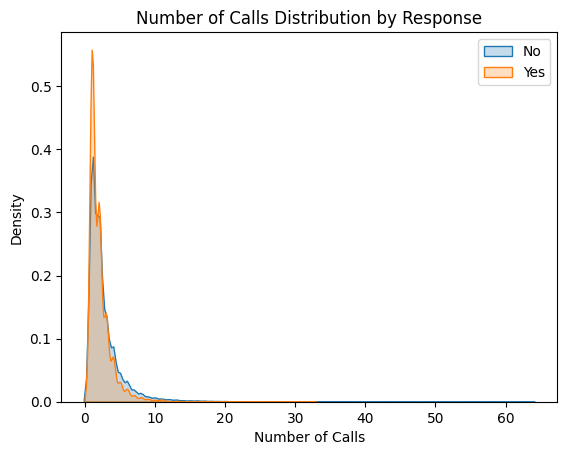


co-relation : -0.0731802440451999


In [203]:
sns.kdeplot(df[df['y']==0]['num_calls'], label='No', shade=True)
sns.kdeplot(df[df['y']==1]['num_calls'], label='Yes', shade=True)
plt.title('Number of Calls Distribution by Response')
plt.xlabel('Number of Calls')
plt.ylabel('Density')
plt.legend()
plt.show()

print()
print(f"co-relation : {df['num_calls'].corr(df['y'])}") #Worst corealtion

In [204]:
df['prev_outcome'].value_counts()

,count
prev_outcome,
unknown,36953
failure,4901
other,1840
success,1511


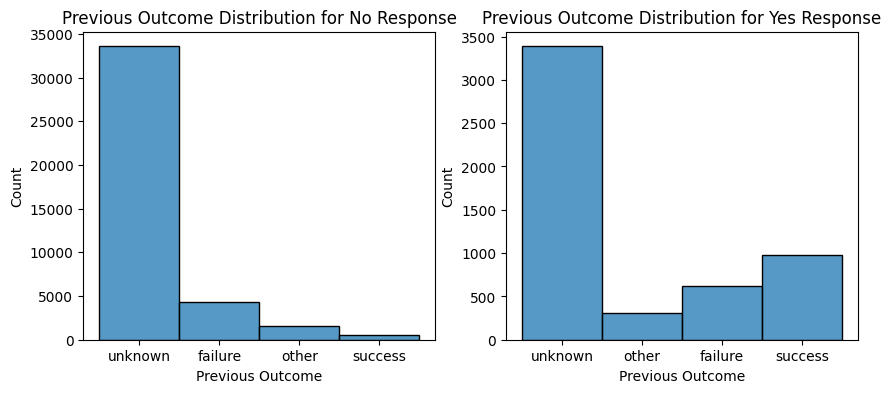

In [205]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.histplot(df[df['y']==0]['prev_outcome'], ax=axes[0])
axes[0].set_title('Previous Outcome Distribution for No Response')
axes[0].set_xlabel('Previous Outcome')

sns.histplot(df[df['y']==1]['prev_outcome'], ax=axes[1])
axes[1].set_title('Previous Outcome Distribution for Yes Response')
axes[1].set_xlabel('Previous Outcome')
plt.show()



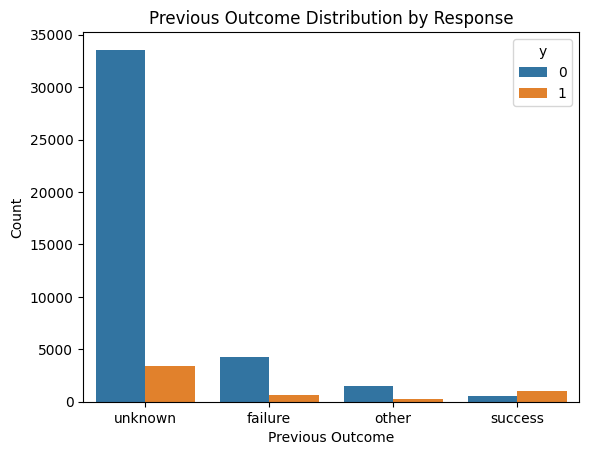

In [206]:
sns.countplot(x=df['prev_outcome'], hue=df['y'], order=df['prev_outcome'].value_counts().index)
plt.title('Previous Outcome Distribution by Response')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()

In [207]:
df.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


# Encoding

In [208]:
from sklearn.preprocessing import LabelEncoder

#Job column Encoding
job_encoder = LabelEncoder()
df['job'] = job_encoder.fit_transform(df['job'])
df['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [209]:
#marital column encoding
df['marital'] = df['marital'].map({'divorced':0,'single':1, 'married':2})
df['marital'].unique()

array([2, 1, 0])

In [210]:
df.dtypes

,0
age,int64
job,int64
marital,int64
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


In [211]:
#education_qual column encoding
df['education_qual']=df['education_qual'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})
df['education_qual'].unique()

array([3, 2, 0, 1])

In [212]:
#call_type column encoding
df['call_type'] = df['call_type'].map({'unknown':0,'telephone':1, 'cellular':2})
df['call_type'].unique()


array([0, 2, 1])

In [213]:
#Month column encoding

from sklearn.model_selection import KFold

df['month_encoded'] = 0

df=df.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(df[['mon','y']]):
    train_data, val_data = df.iloc[train_idx], df.iloc[val_idx]

    # Compute mean conversion rate from training data only
    month_mean = train_data.groupby('mon')['y'].mean().to_dict()

    # Assign target encoding to validation data
    df.loc[val_idx, 'month_encoded'] = df.loc[val_idx, 'mon'].map(month_mean)

# Display the dataframe with encoded values
print(df[['mon', 'y', 'month_encoded']].tail(10))

       mon  y  month_encoded
45195  nov  1       0.098905
45196  nov  1       0.098668
45197  nov  1       0.098905
45198  nov  1       0.103513
45199  nov  1       0.101302
45200  nov  1       0.101302
45201  nov  1       0.103513
45202  nov  1       0.105131
45203  nov  0       0.103513
45204  nov  0       0.098905


In [214]:
df['prev_outcome'].value_counts()

,count
prev_outcome,
unknown,36953
failure,4901
other,1840
success,1511


In [215]:
df['prev_outcome_encoded'] = 0

# K-Fold Target Encoding
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df):
    train_data, val_data = df.iloc[train_idx], df.iloc[val_idx]

    # Compute mean target value for each category in training data
    status_mean = train_data.groupby('prev_outcome')['y'].mean().to_dict()

    # Apply encoding to validation data
    df.loc[val_idx, 'prev_outcome_encoded'] = df.loc[val_idx, 'prev_outcome'].map(status_mean)

# Display the final dataframe
print(df[['prev_outcome', 'y', 'prev_outcome_encoded']].tail(10))

      prev_outcome  y  prev_outcome_encoded
45195      success  1              0.631141
45196      unknown  1              0.090872
45197      unknown  1              0.090553
45198      failure  1              0.125189
45199      unknown  1              0.092432
45200      unknown  1              0.092432
45201      unknown  1              0.091537
45202      success  1              0.649593
45203      unknown  0              0.091537
45204        other  0              0.172203


In [216]:
#checking all the columns
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,month_encoded,prev_outcome_encoded
0,58,4,2,3,0,5,may,261,1,unknown,0,0.067787,0.091537
1,44,9,1,2,0,5,may,151,1,unknown,0,0.066436,0.090872
2,33,2,2,2,0,5,may,76,1,unknown,0,0.067743,0.092756


In [217]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'month_encoded',
       'prev_outcome_encoded'],
      dtype='object')

In [218]:
#Removing the old columns

df=df.drop(['mon','prev_outcome'],axis=1)

age : 0.025125993235085572
job : 0.040431362643178335
marital : -0.04383503381218348
education_qual : 0.0513506004609686
call_type : 0.14839062567259545
day : -0.028370532541669158
dur : 0.3945060538655021
num_calls : -0.0731802440451999
y : 1.0
month_encoded : 0.25915180476789307
prev_outcome_encoded : 0.3110854991031113
Axes(0.125,0.11;0.62x0.77)


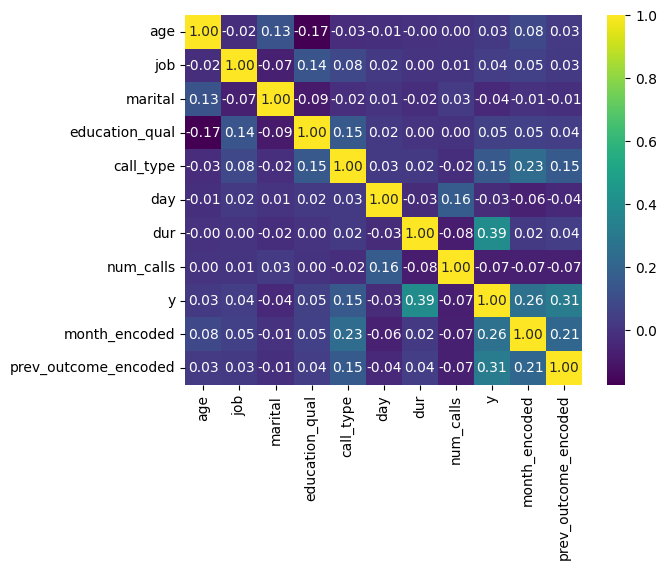

In [219]:
for Column in df.columns:
  print(f"{Column} : {df[Column].corr(df['y'])}")
print(sns.heatmap(df.corr(),annot=True,fmt="0.2f",cmap="viridis"))

In [220]:
#As per EDA analysis and corelation technique,
#we come to a conclusion that we can delete the following columns from df

df=df.drop(columns=['day','num_calls'])

In [221]:
df.head(3)

,age,job,marital,education_qual,call_type,dur,y,month_encoded,prev_outcome_encoded
0,58,4,2,3,0,261,0,0.067787,0.091537
1,44,9,1,2,0,151,0,0.066436,0.090872
2,33,2,2,2,0,76,0,0.067743,0.092756


In [222]:
df.dtypes

,0
age,int64
job,int64
marital,int64
education_qual,int64
call_type,int64
dur,int64
y,int64
month_encoded,float64
prev_outcome_encoded,float64


In [223]:
df1=df.copy()

#checking Skewness in data

In [224]:
df1.skew().sort_values(ascending=False)

,0
prev_outcome_encoded,4.951103
month_encoded,3.363459
dur,3.144145
y,2.383247
age,0.684645
job,0.261736
education_qual,-0.627430
call_type,-0.769498
marital,-0.991044


In [225]:
#skewness subplots function
def plot(df,column):
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column) #displot

  plt.subplot(1,3,2)
  sns.histplot(df, x=column,kde=True,bins=30,color="red")
  plt.title("histplot for"+" "+column) #histplot

  plt.subplot(1,3,3)
  sns.boxplot(df,x=column)
  plt.title("boxplot for"+" "+column) #boxplot

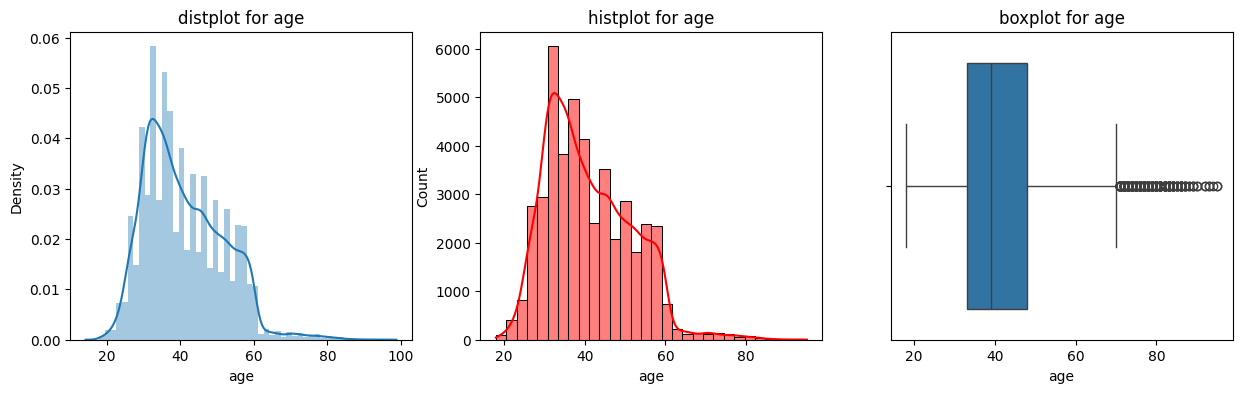

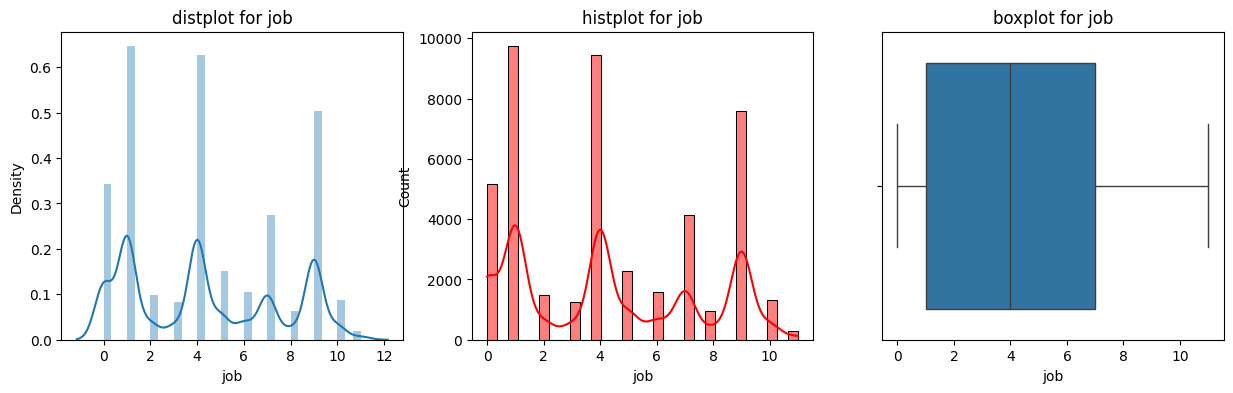

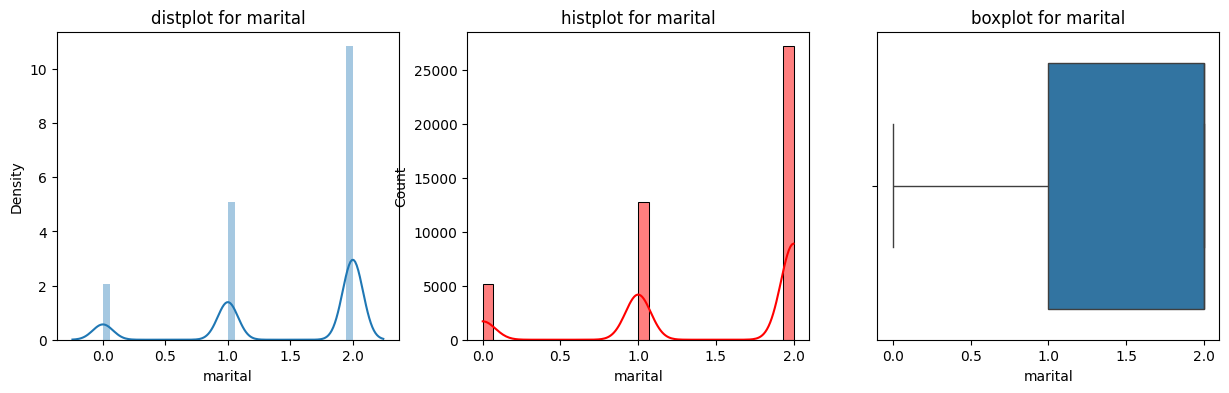

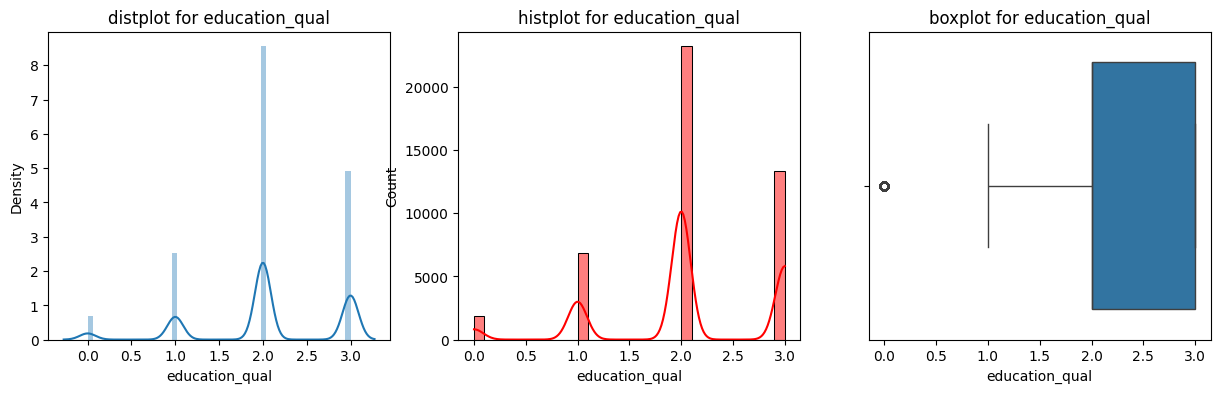

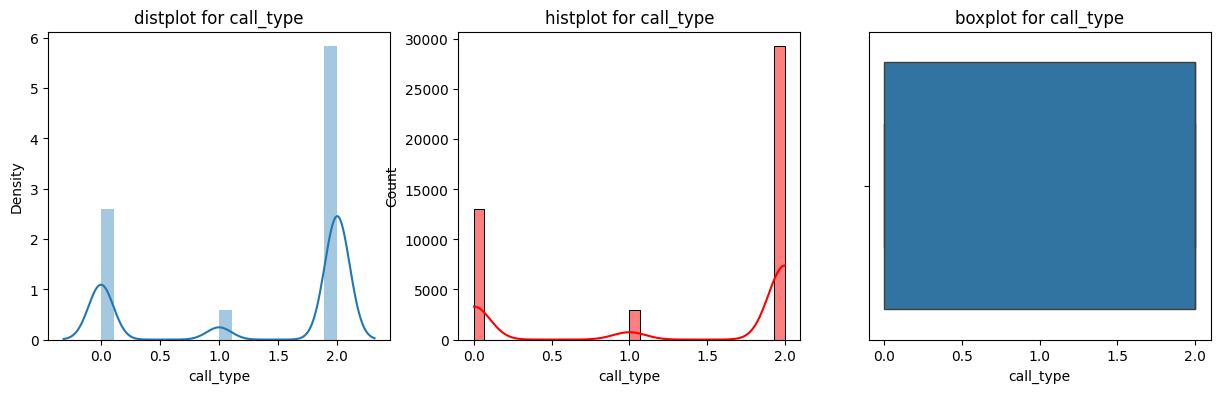

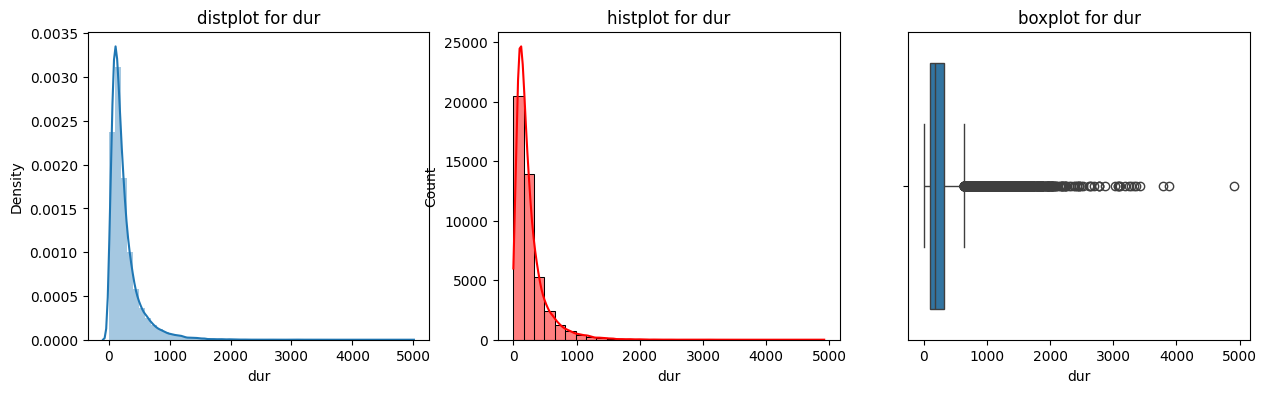

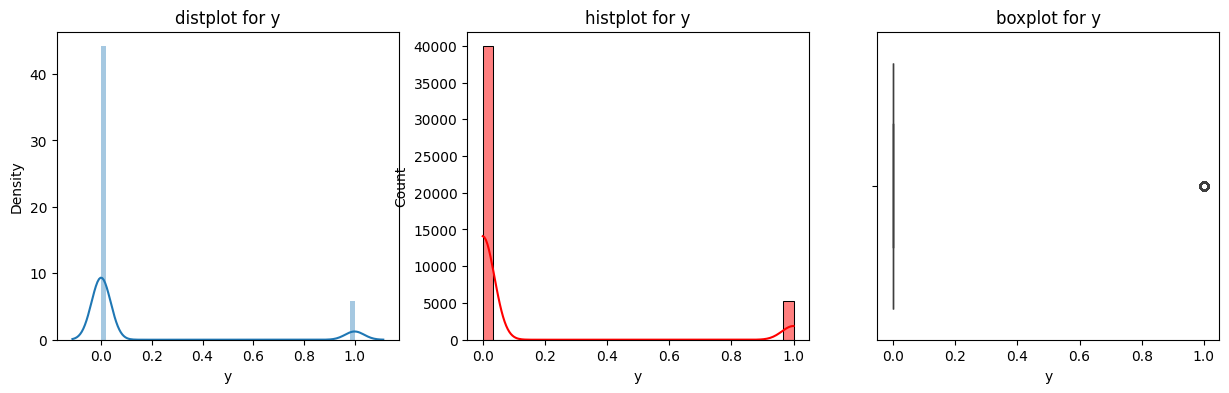

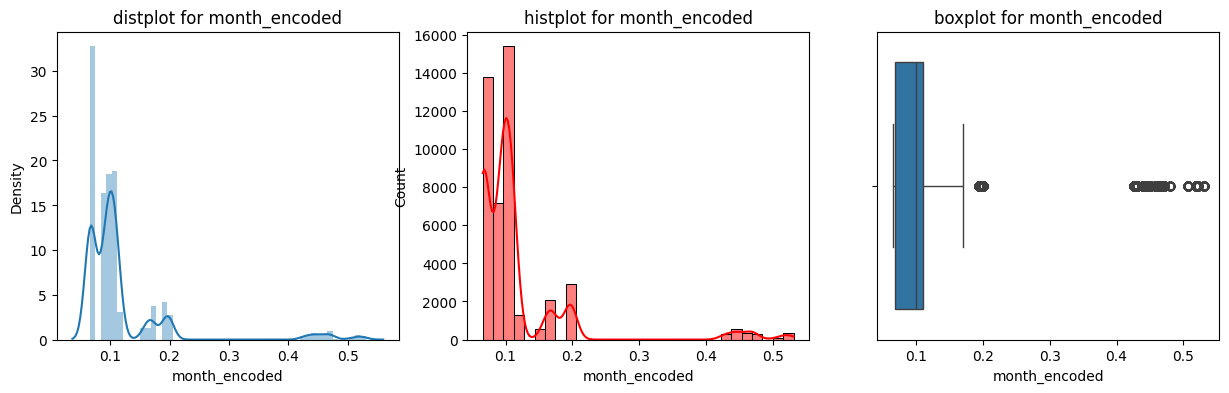

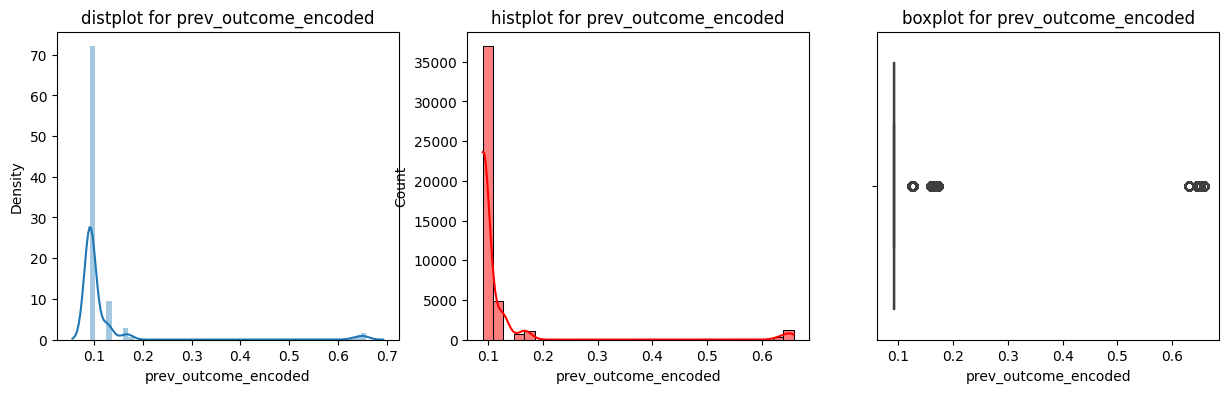

In [226]:
#Skewness Ploting
for column in df1.columns:
  plot(df1,column)

In [227]:
#Skewed columns
#Skewed columns - [prev_outcome_encoded, month_encoded, dur, y]
#After further Analysing the skewness is not important for the categorical columns.
#np.log1p - values not changing
#np.sqrt  - values not changing
#np.cbrt  - values not changing

#Applying the Transformation for duration column

df1['dur'] = np.log1p(df1['dur'])
df1['age']=np.log1p(df1['age']) # slightly skew

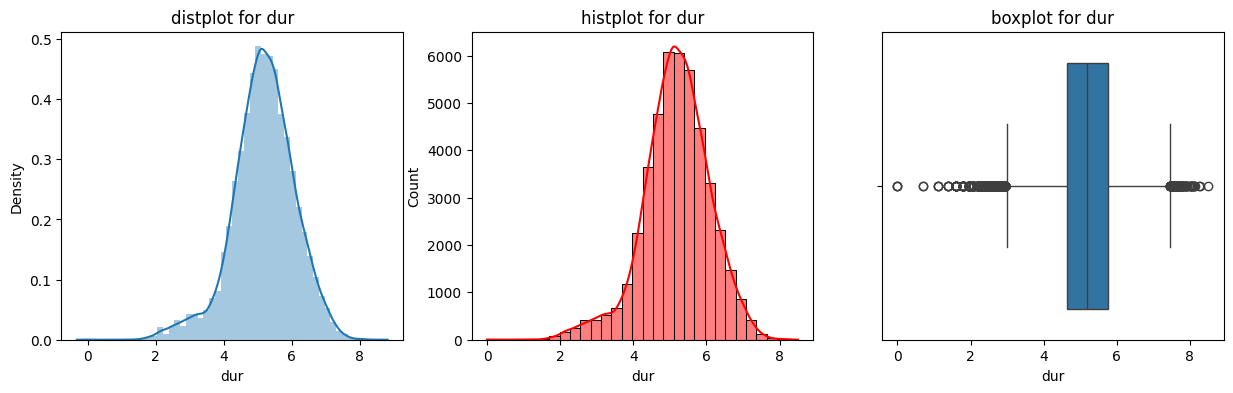

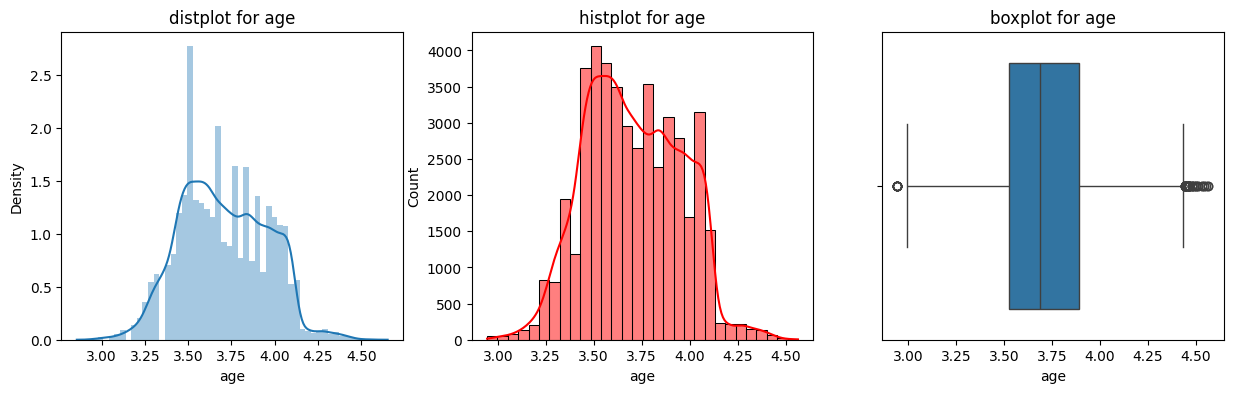

In [231]:
for column in ['dur','age']:
  plot(df1,column)

# outlier detection

In [230]:
for column in ['age','dur'] :
  iqr=df1[column].quantile(0.75)-df1[column].quantile(0.25)
  upper_bound=df1[column].quantile(0.75)+(1.5*iqr)
  lower_bound=df1[column].quantile(0.25)-(1.5*iqr)
  print(f"lower_bound for {column} is {lower_bound}, upper_bound for {column} is {upper_bound}")
  print()
  print(np.log1p(df[column].describe()))
  print()

lower_bound for age is 2.978170864374464, upper_bound for age is 4.440009958352324

count    10.718985
mean      3.736171
std       2.452653
min       2.944439
25%       3.526361
50%       3.688879
75%       3.891820
max       4.564348
Name: age, dtype: float64

lower_bound for dur is 2.958495754162773, upper_bound for dur is 7.454216140772371

count    10.718985
mean      5.557535
std       5.555045
min       0.000000
25%       4.644391
50%       5.198497
75%       5.768321
max       8.500861
Name: dur, dtype: float64



In [232]:
#Split the data:
X=df1.drop(columns=['y'])
y=df1['y']

In [235]:
#Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36164, 8) (9041, 8) (36164,) (9041,)


In [229]:
#Since Its an imbalanced dataset, we are using